In [1]:
# importing dependancies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# defining data files
mouse_data_file = "data/Mouse_metadata.csv"
study_results_file = "data/Study_results.csv"

# read the csv files and load them to pandas
mouse_data = pd.read_csv(mouse_data_file)
study_data = pd.read_csv(study_results_file)

# merging the datasets into a combined dataset
complete_study_data = pd.merge(study_data, mouse_data, how='left', on=["Mouse ID", "Mouse ID"])
#complete_study_data.head(20)
test_complete_study_data = complete_study_data.sort_values(by=["Timepoint"], ascending=False)
test_complete_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,b879,45,72.555239,2,Stelasyn,Female,4,26
1795,s508,45,30.276232,0,Ramicane,Male,1,17
1797,y793,45,31.896238,2,Capomulin,Male,17,17
1798,c766,45,69.823146,4,Placebo,Female,13,26
1799,z578,45,30.638696,0,Ramicane,Male,11,16


In [2]:
# Checking the number of mice in the DataFrame.
print(complete_study_data["Mouse ID"].count())

1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_data = complete_study_data[complete_study_data.duplicated(["Mouse ID", "Timepoint"])]
print((duplicate_mice_data["Mouse ID"]).to_string(index=False))

 g989
 g989
 g989
 g989
 g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
unique_study_data = complete_study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
unique_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
print(unique_study_data["Mouse ID"].count())

1888


In [7]:
# grouping dataset by Drug Regimen and perform statistics by regimen
drug_regimen_data = unique_study_data.groupby(["Drug Regimen"])
drug_regimen_data.first()

# calculating various statistics
mean_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].median()
variance_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].var()
standard_deviation_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].std()
SEM_tumor_volume = drug_regimen_data["Tumor Volume (mm3)"].sem()


# creating new dataframe
summary_drug_data = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Variance Tumor Volume": variance_tumor_volume,
    "Standard Deviation Tumor Volume": standard_deviation_tumor_volume,
    "SEM Tumor Volume": SEM_tumor_volume,
})

# formatting data
summary_drug_data["Mean Tumor Volume"] = summary_drug_data["Mean Tumor Volume"].map("{:.4f}".format)
summary_drug_data["Median Tumor Volume"] = summary_drug_data["Median Tumor Volume"].map("{:.4f}".format)
summary_drug_data["Variance Tumor Volume"] = summary_drug_data["Variance Tumor Volume"].map("{:.4f}".format)
summary_drug_data["Standard Deviation Tumor Volume"] = summary_drug_data["Standard Deviation Tumor Volume"].map("{:.4f}".format)
summary_drug_data["SEM Tumor Volume"] = summary_drug_data["SEM Tumor Volume"].map("{:.4f}".format)

# display summary statistics
summary_drug_data

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3935,50.9100,43.1388,6.5680,0.5259
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


In [8]:
# creating new dataframe grouped by timepoint & performing mouse headcount for each timepoint
time_point_data = unique_study_data.groupby(["Timepoint"])
mice_count_by_time_point = time_point_data["Mouse ID"].count()

# creating new dataframe for charts
mice_count_data_for_bar_chart = pd.DataFrame({
    "Mice Count": mice_count_by_time_point
})

# display dataframe as point of reference
mice_count_data_for_bar_chart

,Mice Count
Timepoint,
0,249
5,237
10,222
15,206
20,194
25,183
30,171
35,154
40,142


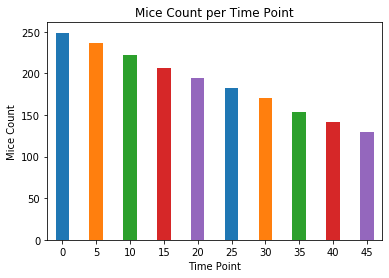

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
group_keys = list(time_point_data.groups.keys())
mice_per_time_point_in_panda = pd.DataFrame({'x_axis':group_keys, 'mice_count':mice_count_by_time_point})
mice_per_time_point_in_panda.plot.bar(x='x_axis', y='mice_count', color=['C0', 'C1', 'C2', 'C3', 'C4'], rot=0, width=0.4, title="Mice Count per Time Point", legend=False)

# Adding axis labels
_=plt.xlabel("Time Point")
_=plt.ylabel("Mice Count")

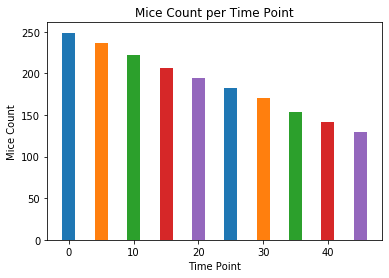

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = time_point_data.groups.keys()
mice_count = mice_count_by_time_point
plt.bar(x_axis, mice_count, color=['C0', 'C1', 'C2', 'C3', 'C4'], width=2, alpha=1, align="center")

# Adding axis label and title of the chart
_=plt.title("Mice Count per Time Point")
_=plt.xlabel("Time Point")
_=plt.ylabel("Mice Count")

In [11]:
# creating new dataframe grouped by the gender of the mouse
gender_data = unique_study_data.groupby(["Sex"])
mice_count_by_gender = gender_data["Mouse ID"].count()

# creating new dataframe for charts
mice_by_gender_for_pie_chart = pd.DataFrame({
    "Mice Count": mice_count_by_gender
})

# display dataframe as point of reference
mice_by_gender_for_pie_chart

,Mice Count
Sex,
Female,930
Male,958


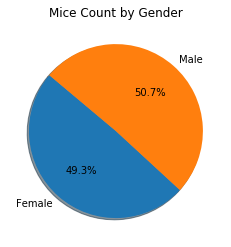

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Labels for the sections of our pie chart
labels = ["Female", "Male"]
# The values of each section of the pie chart
head_count = mice_count_by_gender
# The colors of each section of the pie chart
colors = ["C0", "C1"]
mice_count_by_gender.plot.pie(y=head_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, title="Mice Count by Gender")
# Removing y-axis label
_=plt.ylabel("")

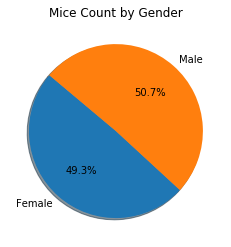

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Plot the chart in MatPlotLib
plt.pie(head_count, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Adding title of the chart
_=plt.title("Mice Count by Gender")

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
capomulin_tumor_volume = unique_study_data.loc[(unique_study_data["Drug Regimen"] == "Capomulin") & (unique_study_data["Timepoint"] == 45)]
ramicane_tumor_volume =  unique_study_data.loc[(unique_study_data["Drug Regimen"] == "Ramicane") & (unique_study_data["Timepoint"] == 45)]
infubinol_tumor_volume = unique_study_data.loc[(unique_study_data["Drug Regimen"] == "Infubinol") & (unique_study_data["Timepoint"] == 45)]
ceftamin_tumor_volume = unique_study_data.loc[(unique_study_data["Drug Regimen"] == "Ceftamin") & (unique_study_data["Timepoint"] == 45)]

# Calculate quantiles across four most promising treatment regimens.
capomulin_tumor_volume_quantile = round(capomulin_tumor_volume["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75, 1]),2)
ramicane_tumor_volume_quantile = round(ramicane_tumor_volume["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75, 1]),2)
infubinol_tumor_volume_quantile = round(infubinol_tumor_volume["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75, 1]),2)
ceftamin_tumor_volume_quantile = round(ceftamin_tumor_volume["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75, 1]),2)

# Creating final_tumor_volume_stat Dataframe
final_tumor_volume_stat = pd.DataFrame({
    "Capomulin Quartile": capomulin_tumor_volume_quantile,
    "Ramicanen Quartile": ramicane_tumor_volume_quantile,
    "Infubinol Quartile": infubinol_tumor_volume_quantile,
    "Ceftamin Quartile": ceftamin_tumor_volume_quantile,
})

# Calculate IQR
capomulin_tumor_volume_IQR = round(st.iqr(capomulin_tumor_volume["Tumor Volume (mm3)"], interpolation = 'midpoint'),2)
ramicane_tumor_volume_IQR = round(st.iqr(ramicane_tumor_volume["Tumor Volume (mm3)"], interpolation = 'midpoint'),2)
infubinol_tumor_volume_IQR = round(st.iqr(infubinol_tumor_volume["Tumor Volume (mm3)"], interpolation = 'midpoint'),2)
ceftamin_tumor_volume_IQR = round(st.iqr(ceftamin_tumor_volume["Tumor Volume (mm3)"], interpolation = 'midpoint'),2)

# Creating IQR row
row = pd.Series({
    "Capomulin Quartile": capomulin_tumor_volume_IQR,
    "Ramicanen Quartile": ramicane_tumor_volume_IQR,
    "Infubinol Quartile": infubinol_tumor_volume_IQR,
    "Ceftamin Quartile": ceftamin_tumor_volume_IQR},
    name="IQR")

# Appending IQR row in the dataframe
final_tumor_volume_stat = final_tumor_volume_stat.append(row)
final_tumor_volume_stat

,Capomulin Quartile,Ramicanen Quartile,Infubinol Quartile,Ceftamin Quartile
0.25,32.38,30.98,62.75,61.43
0.5,37.31,34.85,66.08,64.30
0.75,40.16,38.51,67.69,67.53
1.0,47.69,45.22,72.23,68.92
IQR,7.78,7.74,4.93,6.09


# Quantitatively determine  potential Outliers based on the IQR
### based on the IQR of all four drugs, Infubinol is the potential outlier for the given dataset


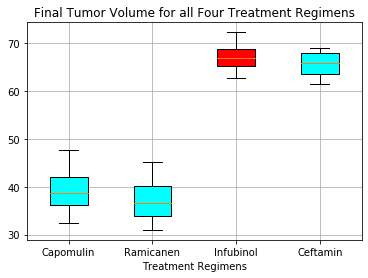

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data=[capomulin_tumor_volume_quantile,
      ramicane_tumor_volume_quantile,
      infubinol_tumor_volume_quantile,
      ceftamin_tumor_volume_quantile]
labels=['Capomulin', 'Ramicanen', 'Infubinol', 'Ceftamin']
box_plot=plt.boxplot(data, labels = labels, patch_artist=True)

# coloring the outlier with red to make it stand out
colors = ['cyan', 'cyan', 'red', 'cyan']
[patch.set_facecolor(color) for patch, color in zip(box_plot['boxes'], colors)]
plt.title("Final Tumor Volume for all Four Treatment Regimens")
plt.xlabel("Treatment Regimens")
plt.grid()
plt.show()

# Potential Outliers
## with 4.93 IQR, Infubinol is the potential Outliers. It's colored in red

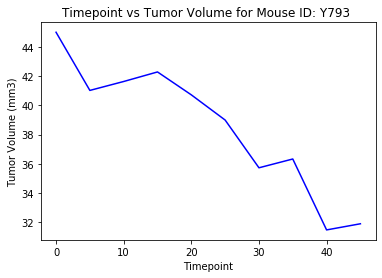

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin)
capomulin_treatment_regimen = unique_study_data.loc[(unique_study_data["Drug Regimen"] == "Capomulin")  & (unique_study_data["Mouse ID"] == "y793")]
treatment_time_point = capomulin_treatment_regimen["Timepoint"]
tumor_volume = capomulin_treatment_regimen["Tumor Volume (mm3)"]

# plotting the chart
_=plt.plot(treatment_time_point, tumor_volume, color="blue")
_=plt.title("Timepoint vs Tumor Volume for Mouse ID: Y793 ")
_=plt.xlabel("Timepoint")
_=plt.ylabel("Tumor Volume (mm3)")

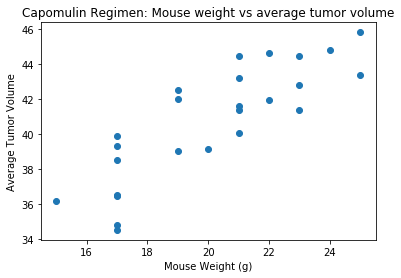

In [42]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
entire_capomulin_treatment_regimen = unique_study_data.loc[(unique_study_data["Drug Regimen"] == "Capomulin")]
capomulin_treatment_regimen_by_mouse = entire_capomulin_treatment_regimen.groupby(["Mouse ID"])
average_tumor_volume = capomulin_treatment_regimen_by_mouse["Tumor Volume (mm3)"].mean()
mouse_weight = entire_capomulin_treatment_regimen.groupby(["Mouse ID"]).nth(1)
weight_of_each_mouse = mouse_weight["Weight (g)"]
_=plt.scatter(weight_of_each_mouse, average_tumor_volume)
_=plt.title("Capomulin Regimen: Mouse weight vs average tumor volume")
_=plt.xlabel("Mouse Weight (g)")
_=plt.ylabel("Average Tumor Volume")